In [3]:
%config Completer.use_jedi = False

In [4]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv('df_for_PCA.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Subject_ID,diagadhd,CHILDgender,age,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,zfALFF_17Networks_10,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,sub-0015,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sub-0085,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sub-0134,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sub-0152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,sub-0260,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df.loc[:, (df != 0).any(axis=0)]
df.head()

,Subject_ID,diagadhd,CHILDgender,age,zReHo_17Networks_15,zfALFF_17Networks_2,zfALFF_17Networks_9,zDCwei_17Networks_9,zfALFF_17Networks_LH_ContA_IPS_1,zReHo_17Networks_LH_ContA_IPS_2,...,zfALFF_mAmyg_L,zReHo_mAmyg_L,zfALFF_mAmyg_R,zfALFF_mPFtha_L,zfALFF_mPMtha_L,zDCwei_mPMtha_L,zfALFF_rHipp_L,zfALFF_rHipp_R,zfALFF_rTtha_L,zfALFF_rTtha_R
0,sub-0015,0,1,1,-0.259515,-0.445804,-0.787030,-0.726765,0.542752,0.328572,...,-0.795787,-0.829478,-0.789197,-0.930684,-0.803501,-0.691142,-0.643343,-0.723022,-0.764751,-0.843242
1,sub-0085,0,0,0,-0.297826,-0.304966,-0.601078,-0.560601,0.524940,0.408825,...,-0.558171,-0.932965,-0.466499,-0.385898,-0.376317,-0.859369,-0.521729,-0.590964,-0.347692,-0.341996
2,sub-0134,0,1,1,-0.356670,-0.231216,-0.799635,-0.502999,0.622862,-0.185365,...,-0.761522,-0.919923,-0.852347,-0.923286,-0.748549,-0.457888,-0.757014,-0.542870,-0.512793,-0.710494
3,sub-0152,0,0,0,-0.239098,-0.223685,-0.485006,-0.026972,0.341035,-0.299220,...,-0.194898,-0.361161,-0.288980,-0.870195,-0.473556,-0.095526,-0.227366,-0.387561,-0.425914,-0.640255
4,sub-0260,1,1,0,-0.274868,-0.356149,-0.853856,-0.746988,0.840104,0.598062,...,-0.532710,-0.814824,-0.632024,-0.949422,-0.802675,-0.730072,-0.608427,-0.571504,-0.641054,-0.797962


In [7]:
df.columns = df.columns.str.replace("gmd", "gmv")
df.columns = df.columns.str.replace("zfALFF", "fALFF")
df.columns = df.columns.str.replace("zReHo", "ReHo")
df.columns = df.columns.str.replace("zDCwei", "DC")

In [8]:
for colname in df.columns:
    #print(colname)
    if (colname.find('17Networks_') != -1) & (colname.find('17Networks_L') == -1) & (colname.find('17Networks_R') == -1):
        #print(colname
        col_new = colname.split("_")
        col_new = col_new[0]+"_cerebellum_"+col_new[2]
        df.rename(columns={colname: col_new}, inplace=True)
    elif (colname.find('17Networks_L') != -1) | (colname.find('17Networks_R') != -1):
        col_new = colname.split("_")
        col_new = col_new[0]+"_cortex_"+"_".join(col_new[2:])
        df.rename(columns={colname: col_new}, inplace=True)

     #   df.columns = df.columns.str.replace("17Networks", "Schaefer")       


In [9]:
df.head()

,Subject_ID,diagadhd,CHILDgender,age,ReHo_cerebellum_15,fALFF_cerebellum_2,fALFF_cerebellum_9,DC_cerebellum_9,fALFF_cortex_LH_ContA_IPS_1,ReHo_cortex_LH_ContA_IPS_2,...,fALFF_mAmyg_L,ReHo_mAmyg_L,fALFF_mAmyg_R,fALFF_mPFtha_L,fALFF_mPMtha_L,DC_mPMtha_L,fALFF_rHipp_L,fALFF_rHipp_R,fALFF_rTtha_L,fALFF_rTtha_R
0,sub-0015,0,1,1,-0.259515,-0.445804,-0.787030,-0.726765,0.542752,0.328572,...,-0.795787,-0.829478,-0.789197,-0.930684,-0.803501,-0.691142,-0.643343,-0.723022,-0.764751,-0.843242
1,sub-0085,0,0,0,-0.297826,-0.304966,-0.601078,-0.560601,0.524940,0.408825,...,-0.558171,-0.932965,-0.466499,-0.385898,-0.376317,-0.859369,-0.521729,-0.590964,-0.347692,-0.341996
2,sub-0134,0,1,1,-0.356670,-0.231216,-0.799635,-0.502999,0.622862,-0.185365,...,-0.761522,-0.919923,-0.852347,-0.923286,-0.748549,-0.457888,-0.757014,-0.542870,-0.512793,-0.710494
3,sub-0152,0,0,0,-0.239098,-0.223685,-0.485006,-0.026972,0.341035,-0.299220,...,-0.194898,-0.361161,-0.288980,-0.870195,-0.473556,-0.095526,-0.227366,-0.387561,-0.425914,-0.640255
4,sub-0260,1,1,0,-0.274868,-0.356149,-0.853856,-0.746988,0.840104,0.598062,...,-0.532710,-0.814824,-0.632024,-0.949422,-0.802675,-0.730072,-0.608427,-0.571504,-0.641054,-0.797962


In [179]:
df.to_csv('df_184.csv')

## definig train and test set with adversarial validation (with covariate)

In [10]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# split data into X and y
#X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2:], data['diagadhd'], test_size=0.3)
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 3)
X_train = training_set.iloc[:,2:].values
y_train = training_set.iloc[:,1].values
X_test = test_set.iloc[:,2:].values
y_test = test_set.iloc[:,1].values

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/tara/Programming/env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:52:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 37.50%


In [11]:
#X = df.iloc[0:,2:]
#y = df.iloc[0:117, 1]
 #Standardizing the 
trans = StandardScaler().fit(X_train)
X_train = trans.transform(X_train)
X_test = trans.transform(X_test)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_fit = pca.fit(X_train)
X_ptrain = pca_fit.transform(X_train)
X_ptest = pca_fit.transform(X_test)

principalDf = pd.DataFrame(data = X_ptrain, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

In [14]:
principalDf.shape

(93, 10)

In [15]:
principalDf['diagadhd'] = df['diagadhd']
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,diagadhd
0,4.691848,2.990758,-0.222577,-0.572312,-4.363044,-1.136979,-0.793608,2.983021,1.059011,-0.087085,0
1,-7.557884,-0.751393,5.630376,3.814211,-0.620427,-1.284495,1.062319,0.657299,0.404423,1.604511,0
2,0.398739,-3.491127,-4.190405,-3.529027,-0.305660,-1.477093,0.157267,-4.536140,-1.524552,-0.502975,0
3,0.112626,1.353005,0.520151,0.660234,1.673579,-0.729346,-3.007683,-1.601249,-1.420720,2.116098,0
4,-3.638245,-4.354194,2.543587,-1.516159,-0.522350,-0.601434,1.722346,-1.045603,0.580569,-0.240038,1


In [16]:
principalDf = principalDf[ ['diagadhd'] + [ col for col in principalDf.columns if col != 'diagadhd' ] ]
principalDf.head()

,diagadhd,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0,4.691848,2.990758,-0.222577,-0.572312,-4.363044,-1.136979,-0.793608,2.983021,1.059011,-0.087085
1,0,-7.557884,-0.751393,5.630376,3.814211,-0.620427,-1.284495,1.062319,0.657299,0.404423,1.604511
2,0,0.398739,-3.491127,-4.190405,-3.529027,-0.305660,-1.477093,0.157267,-4.536140,-1.524552,-0.502975
3,0,0.112626,1.353005,0.520151,0.660234,1.673579,-0.729346,-3.007683,-1.601249,-1.420720,2.116098
4,1,-3.638245,-4.354194,2.543587,-1.516159,-0.522350,-0.601434,1.722346,-1.045603,0.580569,-0.240038


In [17]:
principalDf.to_csv('pcadf.csv')

In [18]:
principalDf

,diagadhd,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0,4.691848,2.990758,-0.222577,-0.572312,-4.363044,-1.136979,-0.793608,2.983021,1.059011,-0.087085
1,0,-7.557884,-0.751393,5.630376,3.814211,-0.620427,-1.284495,1.062319,0.657299,0.404423,1.604511
2,0,0.398739,-3.491127,-4.190405,-3.529027,-0.305660,-1.477093,0.157267,-4.536140,-1.524552,-0.502975
3,0,0.112626,1.353005,0.520151,0.660234,1.673579,-0.729346,-3.007683,-1.601249,-1.420720,2.116098
4,1,-3.638245,-4.354194,2.543587,-1.516159,-0.522350,-0.601434,1.722346,-1.045603,0.580569,-0.240038
...,...,...,...,...,...,...,...,...,...,...,...
88,0,4.147726,-0.647161,-4.492480,-4.253539,1.877554,-0.365687,-1.046192,1.909643,1.811026,0.266446
89,0,-1.742813,2.296196,6.211362,0.470730,-2.262614,-0.551776,-1.364477,0.937414,-0.834788,-0.148567
90,1,8.901429,-0.416557,-0.058608,2.667041,-5.655250,-0.747697,0.706145,-0.107294,3.322328,-0.700786
91,0,-7.377201,-0.542476,1.209440,-1.083992,1.400272,-2.912073,0.483351,0.426557,-0.150602,5.692911


### Scree plot, explained_variance_ratio_, and explained_variance_ to find proper number of components

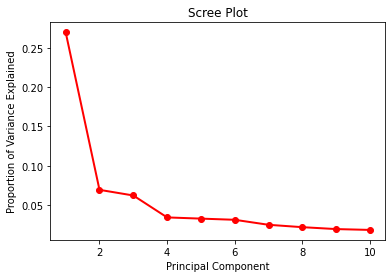

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [20]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.26997535 0.06922444 0.06203024 0.03409902 0.03256005 0.0310646
 0.0246832  0.02166536 0.01922796 0.01816958]
Cumulative Prop. Variance Explained:  [0.26997535 0.33919978 0.40123002 0.43532905 0.4678891  0.49895369
 0.52363689 0.54530225 0.56453021 0.58269979]


In [21]:
print(pca.explained_variance_)

[50.76123424 13.01569867 11.66303386  6.41135776  6.12199688  5.84081943
  4.64097809  4.07355904  3.61527458  3.41627568]


In [22]:
features = df.drop(['Subject_ID', 'diagadhd'], axis =1)

In [23]:
features.head()

,CHILDgender,age,ReHo_cerebellum_15,fALFF_cerebellum_2,fALFF_cerebellum_9,DC_cerebellum_9,fALFF_cortex_LH_ContA_IPS_1,ReHo_cortex_LH_ContA_IPS_2,fALFF_cortex_LH_ContA_IPS_3,fALFF_cortex_LH_ContA_PFCl_3,...,fALFF_mAmyg_L,ReHo_mAmyg_L,fALFF_mAmyg_R,fALFF_mPFtha_L,fALFF_mPMtha_L,DC_mPMtha_L,fALFF_rHipp_L,fALFF_rHipp_R,fALFF_rTtha_L,fALFF_rTtha_R
0,1,1,-0.259515,-0.445804,-0.787030,-0.726765,0.542752,0.328572,0.564008,0.307889,...,-0.795787,-0.829478,-0.789197,-0.930684,-0.803501,-0.691142,-0.643343,-0.723022,-0.764751,-0.843242
1,0,0,-0.297826,-0.304966,-0.601078,-0.560601,0.524940,0.408825,0.493754,0.584087,...,-0.558171,-0.932965,-0.466499,-0.385898,-0.376317,-0.859369,-0.521729,-0.590964,-0.347692,-0.341996
2,1,1,-0.356670,-0.231216,-0.799635,-0.502999,0.622862,-0.185365,0.385491,0.444957,...,-0.761522,-0.919923,-0.852347,-0.923286,-0.748549,-0.457888,-0.757014,-0.542870,-0.512793,-0.710494
3,0,0,-0.239098,-0.223685,-0.485006,-0.026972,0.341035,-0.299220,0.199497,0.143178,...,-0.194898,-0.361161,-0.288980,-0.870195,-0.473556,-0.095526,-0.227366,-0.387561,-0.425914,-0.640255
4,1,0,-0.274868,-0.356149,-0.853856,-0.746988,0.840104,0.598062,0.488832,0.392672,...,-0.532710,-0.814824,-0.632024,-0.949422,-0.802675,-0.730072,-0.608427,-0.571504,-0.641054,-0.797962


In [24]:
loadings = pd.DataFrame(pca.components_.T, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'], index=features.columns)
#loadings = loadings[['pc1','pc2','pc3','pc4','pc5']]
#PC1 = loadings.sort_values("pc1")
#loadings.sort_values(by = 'pc1').to_csv('pcadf.csv')
#loadings.sort_values(by=('pc1'))

In [15]:
#loadings = loadings.loc[(loadings!=0).any(1)]
#loadings.shape

In [16]:
#loadings.loc['CHILDgender']

In [17]:
#loadings.loc['age']

In [18]:
#loadings.sort_values(by='pc1').head(60)

In [19]:
#plt.scatter(principalDf["pc1"], principalDf["pc2"], c = df["diagadhd"])

### removing features with 0 value in components from features dataframe

In [20]:
#loadings = loadings.reset_index()
#loadings.head()

In [21]:
#df = features.copy()
#df2 = pd.DataFrame()
#for col in features.columns:
    #print(col)
#    for feat in loadings['index'].values:
#        if col == feat:
#            df2 = pd.concat([df2, df[[col]]], axis=1)
#            break

In [22]:
#loadings = loadings.set_index('index')
#loadings.head()

In [25]:
backup_loadings = loadings.copy()

In [26]:
loadings = loadings[abs(loadings["pc1"])>0]

In [27]:
loadings.shape

(186, 10)

In [28]:
loadings.sort_values(by = 'pc1')

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
fALFF_cortex_RH_ContA_PFCl_4,-0.118738,0.036506,-0.013437,0.027481,0.005502,-0.035937,-0.060155,-0.050274,0.025005,0.031491
fALFF_cortex_RH_SalVentAttnA_PrC_1,-0.116556,0.018364,-0.005143,0.024312,0.046022,0.000657,-0.052976,-0.009675,0.011074,-0.059848
fALFF_cortex_RH_SalVentAttnB_PFCl_1,-0.116202,0.011013,-0.002836,0.065354,-0.097742,-0.024465,0.065125,0.004701,0.042856,0.013069
fALFF_cortex_LH_DefaultB_PFCd_1,-0.115851,0.075762,0.021932,0.005919,-0.063348,0.014521,0.017394,-0.091195,0.009847,-0.027522
fALFF_cortex_RH_SalVentAttnB_PFCl_2,-0.114905,0.037397,0.024220,0.042132,-0.073675,0.010456,0.069289,-0.042856,0.012103,-0.006578
...,...,...,...,...,...,...,...,...,...,...
DC_lPFtha_L,0.089722,0.053018,-0.003296,-0.006975,-0.085682,-0.037503,0.029316,0.145498,0.010571,-0.011612
fALFF_rHipp_L,0.089928,0.112629,-0.079341,0.048393,-0.043995,-0.048981,-0.102277,0.062227,-0.032599,0.023769
DC_cerebellum_9,0.090069,-0.001894,0.083015,0.072278,-0.077000,-0.146310,0.001166,-0.035004,0.039611,-0.038408
fALFF_cortex_LH_LimbicA_TempPole_5,0.095520,-0.082732,-0.117847,0.009501,-0.029536,-0.054474,0.032208,0.102421,-0.096170,-0.069012


In [40]:
loadings.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
CHILDgender,-0.016769,-0.011039,0.003108,-0.082948,-0.016160,-0.082586,-0.003178,-0.145578,-0.042701,0.202642
age,-0.022956,-0.036557,0.022685,-0.017647,-0.023239,0.007665,0.094090,-0.019445,-0.057112,0.025295
ReHo_cerebellum_15,0.071675,-0.019232,0.104439,0.059503,0.032228,-0.058393,0.052382,-0.066388,-0.025460,-0.136912
fALFF_cerebellum_2,0.084517,-0.105303,0.060288,-0.018802,0.024078,0.024613,-0.068063,-0.204985,0.059570,-0.077714
fALFF_cerebellum_9,0.085192,-0.001887,0.131196,0.010148,0.042818,0.018009,-0.008487,-0.152702,0.158277,-0.038284


## components evaluation figures

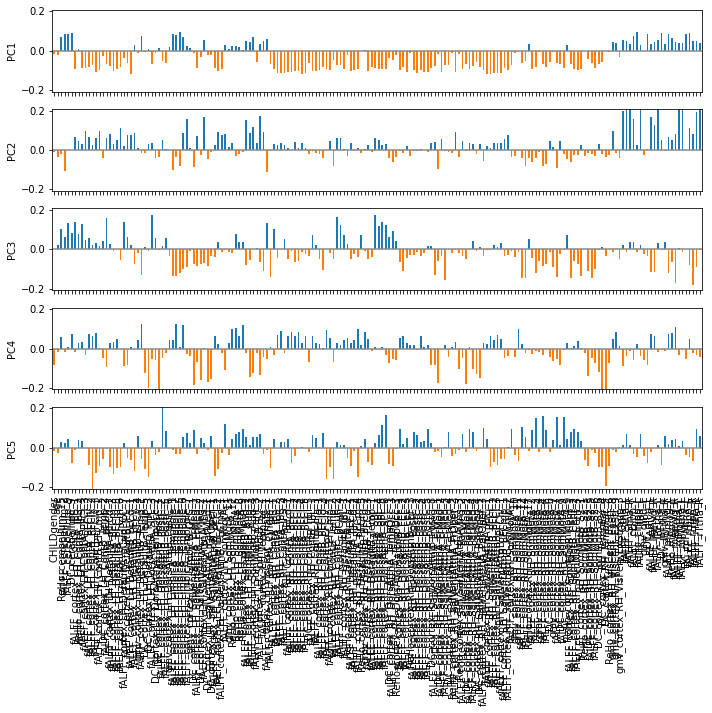

In [32]:
#loadings = pd.DataFrame(pca.components_[0:5, :], 
                    #    columns=features.columns)
#loadings = loadings.loc[(loadings!=0).any(1)]
#loadings = loadings.reset_index()
maxPC = 1.01 * np.max(np.max(np.abs(loadings.iloc[0:5, :])))
f, axes = plt.subplots(5, 1, figsize=(10, 10), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.iloc[:, i]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)
plt.tight_layout()
plt.show()

In [28]:
#correlation of features and components
#import seaborn as sns
#import matplotlib.pyplot as plt

#sns.set(rc = {'figure.figsize':(50,80)})
#ax = sns.heatmap(loadings, annot=True, cmap='Spectral')
#plt.show()
#plt.savefig('test.png')

## SVM with nested cross validation using just pc1

In [7]:
# Load required packages
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC

In [56]:
#pcadf = principalDf[['diagadhd', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5','pc6']]
#pcadf.head()

In [57]:
#pcadf.to_csv('pcadf.csv')

In [9]:
%%time
svm = make_pipeline(StandardScaler(), SVC(random_state=1, class_weight={0:1, 1:2}))
#
# Create the parameter grid
#
#svm = SVC(random_state=1)
param_grid = [{
    'svc__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
    'svc__kernel': ['linear']
}, {
    'svc__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
    'svc__gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
    'svc__kernel': ['rbf']
}]
#
# Create the Grid Search estimator instance for selecting model using
# 2-fold StratifiedKFold cross validation
#
gs = GridSearchCV(estimator=svm, param_grid = param_grid,
                 cv = 3, scoring = 'accuracy', n_jobs = 10, refit = True)

# Calculate the generalization error / accuracy
gs.fit(X_ptrain,y_train)

#clf = make_pipeline(StandardScaler(), kernel = 'linear', C=0.1)
scores = cross_val_score(gs, X_ptrain, y_train, scoring='accuracy', cv=10)

# Print the mean scores and standard deviation
#
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.560 +/- 0.107
CPU times: user 3.1 s, sys: 117 ms, total: 3.22 s
Wall time: 5.49 s


In [45]:
#pred = gs.predict(y_test)

In [46]:
#gs.best_params_

In [47]:
#classifier = SVC(kernel='linear', C=1, random_state = 1)
#classifier.fit(X_train,y_train)

In [48]:
#Y_pred = classifier.predict(X_test)

In [49]:
#classifier.score(X_test,y_test)

In [145]:
#clf = make_pipeline(StandardScaler(), kernel = 'linear', C=0.1)
scores = cross_val_score(gs, X_ptest, y_test, scoring='accuracy', cv=10)

# Print the mean scores and standard deviation
#
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


CV accuracy: 0.583 +/- 0.352


# Evaluation

In [146]:
# Confusion matrix
confusion = confusion_matrix(y_test, gs.predict(X_ptest))
print(confusion)

[[13  2]
 [ 8  1]]


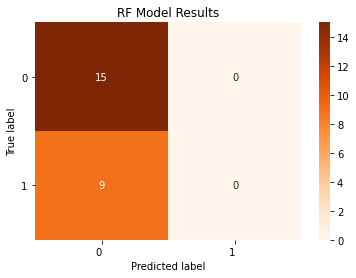

In [103]:
import seaborn as sns

heatmap = sns.heatmap(confusion, annot=True, cmap='Oranges')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),
                            rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),
                            rotation=0, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('RF Model Results')
plt.show()

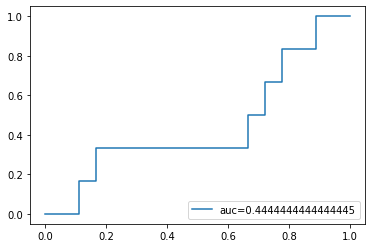

In [59]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [60]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

print('the sensitivity if this model is: ', TP / float(TP+FN))

# Let us calculate specificity

print('the specificity if this model is: ', TN / float(TN+FP))

the sensitivity if this model is:  0.3333333333333333
the specificity if this model is:  0.8333333333333334


In [61]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_score1 = model.predict_proba(X_test)[:,1]
y_score2 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score1))

roc_auc_score for SVM:  0.4444444444444445
